# TP 1 : Regression Linéaire
auteur : Julien Guégan

In [24]:
# import Librairies
from os import path
import pandas as pd
import sys
import matplotlib.pyplot as plt     
import numpy as np
import math
import sklearn.linear_model as linear_model
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

# Question 1
Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations

In [25]:
filename = 'https://perso.telecom-paristech.fr/mozharovskyi/resources/invest.txt'
df = pd.read_csv(filename, sep=' ') # charge les données
df.head() # affiche résumé un des données

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# Question 2
Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse
et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes
en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables

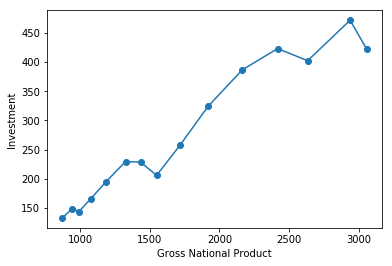

In [26]:
# affiche les données 'gnp' et 'invest' sur un graphique
fig1 = plt.figure()
plt.plot(df['gnp'],df['invest'],'-o')
plt.ylabel('Investment')
plt.xlabel('Gross National Product')
plt.show()
# passe les données au logarithme
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])

# Question 3
Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté $\theta_n \in \mathbb{R}^2$

In [27]:
x = df['gnp'] 
y = df['invest']
xm = x.mean()
ym = y.mean()

# moindres carrés
pente = ((x - xm) * (y - ym)).sum() / (((x - xm)**2).sum())
intercept = ym - pente * xm
# y predits par notre estimateur
yc = pente * x + intercept 
# erreur standard
n = len(x) # nombre d'observations
DF = n - 2 # Degré de liberté
se = np.sqrt(1/DF * ((y - yc)**2).sum())
se_pente = se / np.sqrt(((x-xm)**2).sum()) # errreur sur l'intercept
se_intercept = se_pente * np.sqrt((x**2).sum() / n ) # erreur sur la pente
# coefficient de determination
R2 = ((yc - ym)**2).sum() / ((y - ym)**2).sum()

print("intercept = " + str(intercept))
print("pente = " + str(pente))
print("ecart-types = " + str(se_intercept) + ' ; ' + str(se_pente))
print("R2 = " + str(R2))

intercept = -1.9635913352301815
pente = 1.0152814015988707
ecart-types = 0.40954727166230814 ; 0.05538306035485281
R2 = 0.9627572956057852


# Question 4
La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student
($t$-test). Donner la valeur de la statistique de test ainsi que la $p$-valeur.

In [28]:
# statistique de test
T = pente/se_pente
# p value
p = 2 * (1 - stats.t.cdf(T,df=DF))

print("T = " + str(T))
print("p-value = " + str(p))
print(" => la pente estimée est statistiquement significative car p-value proche de 0")

T = 18.331984456866675
p-value = 1.1363709973011282e-10
 => la pente estimée est statistiquement significative car p-value proche de 0


# Question 5
Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CI(x) et PI(x), respectivement (avec les notations du polycopié, $x = (1, 1000^T)$).


In [29]:
# calcul prediction pour GNP = 1000
predict_1000 =  pente * np.log(1000) + intercept
# intervalle de confiance
alpha = 0.1
q = stats.norm.ppf(1 - alpha/2)
delta_IC_1000 = se * q * np.sqrt(1/n + (np.log(1000)-xm)**2 / ((np.log(1000)-xm)**2).sum())
# intervalle de confiance sur la prediction
delta_PI_1000 = se * q * np.sqrt(1 + 1/n + (np.log(1000)-xm)**2 / (np.log(1000)-xm)**2).sum()

print('prediction(GNP=1000) = '+str(predict_1000))
print('IC(GNP=1000) = [' + str(predict_1000-delta_IC_1000) + ',' + str(predict_1000+delta_IC_1000) + ']')
print('PI(GNP=1000) = [' + str(predict_1000-delta_PI_1000) + ',' + str(predict_1000+delta_PI_1000) + ']')

prediction(GNP=1000) = 5.049724126316801
IC(GNP=1000) = [4.900884463036178,5.198563789597424]
PI(GNP=1000) = [4.842548083069433,5.256900169564169]


# Question 6 
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

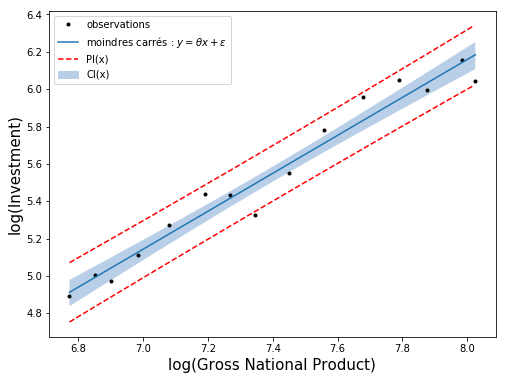

In [30]:
x_vect = np.arange(np.min(x), np.max(x), 0.05) # vecteur des variables explicatives où calculer CI
y_vect = np.dot(pente,x_vect.T) + intercept # vecteur des observations où calculer CI
# calcul de delta IC p
T = stats.norm.ppf(1 - alpha/2)
delta_IC = T * se * np.sqrt(1/n + (x_vect - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
# calcul de delta PI
delta_PI = T * se * np.sqrt(1 + 1/n + (x_vect - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
# affiche figure
fig2 = plt.figure(figsize=(8,6))
plt.plot(x,y,'ok',markersize=3,label='observations')
plt.plot(x,yc,label=r'moindres carrés : $y = \theta x + \epsilon$')
plt.fill_between(x_vect, y_vect-delta_IC, y_vect+delta_IC,color="#b9cfe7",label=r'CI(x)')
plt.plot(x_vect,y_vect+delta_PI,'r--',label=r'PI(x)')
plt.plot(x_vect,y_vect-delta_PI,'r--')
plt.xlabel(r'log(Gross National Product)',fontsize=15)
plt.ylabel(r'log(Investment)',fontsize=15)
plt.legend()
plt.show()

# Question 7
En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [31]:
# appelle à la librairie
regr = linear_model.LinearRegression()
regr.fit(df[['gnp']],df['invest'])
regr_coef = regr.coef_
regr_intercept = regr.intercept_
regr_score = regr.score(df[['gnp']],df['invest'])
regr_predict = regr.predict([[np.log(1000)]])
# print and test la validité (calcul manuel vs résultat de la librairie)
print('pente: ', regr_coef,'==>',np.allclose(regr_coef, pente))
print('intercept:', regr_intercept,'==>',np.allclose(regr_intercept, intercept))
print('score:', regr_score,'==>',np.allclose(regr_score, R2))
print('prediction',regr_predict,'==>',np.allclose(regr_predict, predict_1000))

pente:  [1.0152814] ==> True
intercept: -1.9635913352301815 ==> True
score: 0.9627572956057855 ==> True
prediction [5.04972413] ==> True


# Question 8
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).

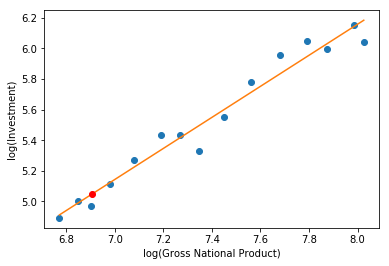

In [32]:
fig3 = plt.figure()
plt.plot(x,y,'o')
plt.plot(x,yc)
plt.plot(np.log(1000),regr_predict,'ro')
plt.xlabel('log(Gross National Product)')
plt.ylabel('log(Investment)')
plt.show()

On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique). Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

# Question 9
Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de
rang plein ?

In [33]:
# construction de la matrice des variables explicatives
one = pd.Series(np.ones(n))
y = df['invest']
X = pd.concat([one,x,df['interest']],axis=1)
# calcul de la matrice de Gram
Gram = X.T.dot(X)
print('matrice de Gram = \n'+ str(Gram.values))
print("\nrank(X) = " + str(np.linalg.matrix_rank(Gram)) + " ==> OK, le rang est plein")

matrice de Gram = 
[[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]

rank(X) = 3 ==> OK, le rang est plein


# Question 10
Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart-types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients

In [34]:
# resolution de l'équation normale
Theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
Ypred = np.dot(X, Theta)
# estimation du bruit
rankX = np.linalg.matrix_rank(X)
res = y - Ypred
s2pred = 1./(n-rankX) * res.dot(res)
# covariance
inv_Gram = np.linalg.inv(Gram)
cov = np.dot(s2pred,inv_Gram)
# ecart-type des coefficients
sc = np.sqrt(np.diag(cov))
# calcul du coefficient de determination
tot = y - y.mean()
R2 = 1 - (res.dot(res) / tot.dot(tot))
# statistique de test
Test = Theta/sc
# p value
pvalue = 2 * (1 - stats.t.cdf(np.abs(Test),df=n-rankX))

print("Coefficients: ", Theta)
print("ecart-types: ", sc)
print("R2: ", R2)
print("T = " + str(Test))
print("p-value = " + str(pvalue))
print(" => la variable 'interest' n'est pas statistiquement significative (p-value proche de 1)")

Coefficients:  [-2.18045473  1.05124269 -0.00652888]
ecart-types:  [0.6623992  0.10206138 0.01534421]
R2:  0.9633108306726244
T = [-3.29175327 10.30010285 -0.4254948 ]
p-value = [6.43836705e-03 2.59951685e-07 6.78007142e-01]
 => la variable 'interest' n'est pas statistiquement significative (p-value proche de 1)


# Question 11
Pour les valeurs de GNP 1000 et interest 10, i.e., $x=(1, 1000, 10)^T$, prédire log(investment) et
donner les intervalles de confiance $CI(x)$ et $PI(x)$ au niveau 99.9%.

In [35]:
# prediction
X_1000 = np.array([1,np.log(1000),10])
Ypred_1000 = np.dot(X_1000, Theta)
# intervalle de confiance
alpha = 0.01
Q = stats.norm.ppf(1 - alpha/2) # statistique de test
delta_IC_1000 = Q * np.sqrt(s2pred) * np.sqrt(X_1000.T.dot(inv_Gram).dot(X_1000))
# intervalle de confiance sur la prediction
delta_PI_1000 = Q * np.sqrt(s2pred) * np.sqrt(1 + np.dot(np.dot(X_1000.T,inv_Gram),X_1000)) 

print('prediction(GNP=1000,interest=10) = ' + str(Ypred_1000))
print('IC(GNP=1000,interest=10) = [' + str(Ypred_1000-delta_IC_1000) + ',' + str(Ypred_1000+delta_IC_1000) + ']')
print('PI(GNP=1000,interest=10) = [' + str(Ypred_1000-delta_PI_1000) + ',' + str(Ypred_1000+delta_PI_1000) + ']')

prediction(GNP=1000,interest=10) = 5.015983730482249
IC(GNP=1000,interest=10) = [4.79179599190023,5.2401714690642685]
PI(GNP=1000,interest=10) = [4.692539627581621,5.339427833382877]


# Question 12
Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

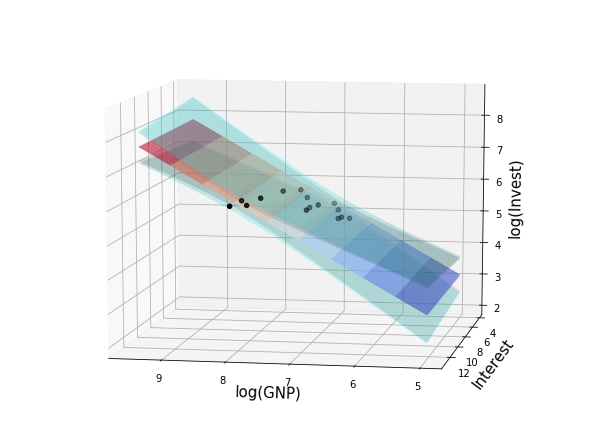

In [36]:
# construction d'une meshgrid où évaluer nos données
x_surf = np.arange(5, 10, 0.5)
y_surf = np.arange(4, 13, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
A = np.vstack([np.ones(x_surf.ravel().shape),x_surf.ravel(),y_surf.ravel()]).T
# évalue notre estimateur des moindres carrés aux points
z_surf = np.dot(A, Theta)
z_surf = z_surf.reshape(x_surf.shape)
# calcul de delta IC/PI
delta_IC_surf = np.zeros(len(A))
delta_PI_surf = np.zeros(len(A))
for i in np.arange(0,len(A)):
    delta_IC_surf[i] = Q * np.sqrt(s2pred) * np.sqrt(A[i,:].T.dot(inv_Gram).dot(A[i,:]))
    delta_PI_surf[i] = Q * np.sqrt(s2pred) * np.sqrt(1 + A[i,:].T.dot(inv_Gram).dot(A[i,:]))   
delta_IC_surf = delta_IC_surf.reshape(x_surf.shape) # aplati
delta_PI_surf = delta_PI_surf.reshape(x_surf.shape)

fig4 = plt.figure(figsize=(8,6))
ax = Axes3D(fig4)
ax.scatter(X['gnp'], X['interest'], y, color='k',label='observations')
ax.plot_surface(x_surf, y_surf, z_surf ,cmap=plt.cm.coolwarm, alpha = 0.6,label=r'moindres carrés : $y = \theta x + \epsilon$')
ax.plot_surface(x_surf, y_surf, z_surf + delta_IC_surf, color = 'grey', alpha = 0.2)
ax.plot_surface(x_surf, y_surf, z_surf - delta_IC_surf, color = 'grey', alpha = 0.2,label=r'CI(x)')
ax.plot_surface(x_surf, y_surf, z_surf + delta_PI_surf, color = 'cyan', alpha = 0.2,label=r'PI(x)')
ax.plot_surface(x_surf, y_surf, z_surf - delta_PI_surf, color = 'cyan', alpha = 0.2)
ax.view_init(10,100)
ax.set_xlabel('log(GNP)',fontsize=15),ax.set_ylabel('Interest', fontsize=15),ax.set_zlabel('log(Invest)', fontsize=15)
#ax.legend()
plt.show()

# Question 13
En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [37]:
regr2 = linear_model.LinearRegression(fit_intercept=False)
regr2.fit(X,y)
regr_coef2 = regr2.coef_
regr_intercept2 = regr_coef2[0]
regr_score2 = regr2.score(X,y)
X_log1000 = np.array((1,np.log(1000),10)).reshape(1,-1)
regr_predict2 = regr2.predict(X_log1000)

print('pente: ', regr_coef2,'==>',np.allclose(regr_predict, predict_1000))
print('intercept:', regr_intercept2,'==>',np.allclose(regr_predict, predict_1000))
print('score:', regr_score2,'==>',np.allclose(regr_predict, predict_1000))
print('predict:', regr_predict2,'==>',np.allclose(regr_predict, predict_1000))

pente:  [-2.18045473  1.05124269 -0.00652888] ==> True
intercept: -2.1804547259113924 ==> True
score: 0.9633108306726242 ==> True
predict: [5.01598373] ==> True
